# House Price Prediction

## Basic Info about Kernel:   
1. problem type : regression pro
2. Data Type : train.csv, test.csv
3. target : Predict SalePrice

## somethng  

## 1: Import lib we may need

In [1]:
# data processing package
import numpy as np
import pandas as pd

#visualisation package
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', context='notebook', palette='deep')
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)

#Stastic Tool package for transformation
from scipy import stats
from scipy.stats import skew,norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr

#Model package



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2: Data input & Overview

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## 3: Data preprocessing 

** (0) Before all, Depart feature "Id" ,for it's no usage for prediction,but it will be used for submission.**

In [9]:
train_id = train['Id']
test_id = test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

### A:Target Feature related work(which means just considering train set)

** (1) Find outliers and Remove them **

** As usual, outliers exist among data points whose some feature has a big correlation with target feature. **

Like feature 'GrLivArea' :

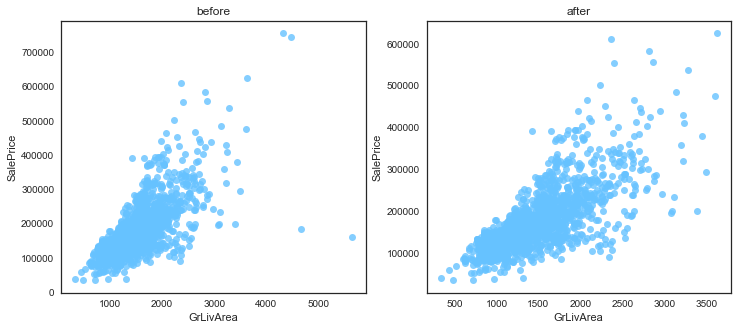

In [10]:
plt.subplots(figsize = (12,5))

plt.subplot(1,2,1)
g = sns.regplot(x= train['GrLivArea'], y= train['SalePrice'], fit_reg=False).set_title('before')

plt.subplot(1,2,2)
train = train.drop(train[train['GrLivArea'] > 4000].index)
g = sns.regplot(x = train['GrLivArea'], y= train['SalePrice'], fit_reg=False).set_title('after')

** (2)Target Feature **

Target Feature : SalePrice  
numerical typy -> skew distribution or not?

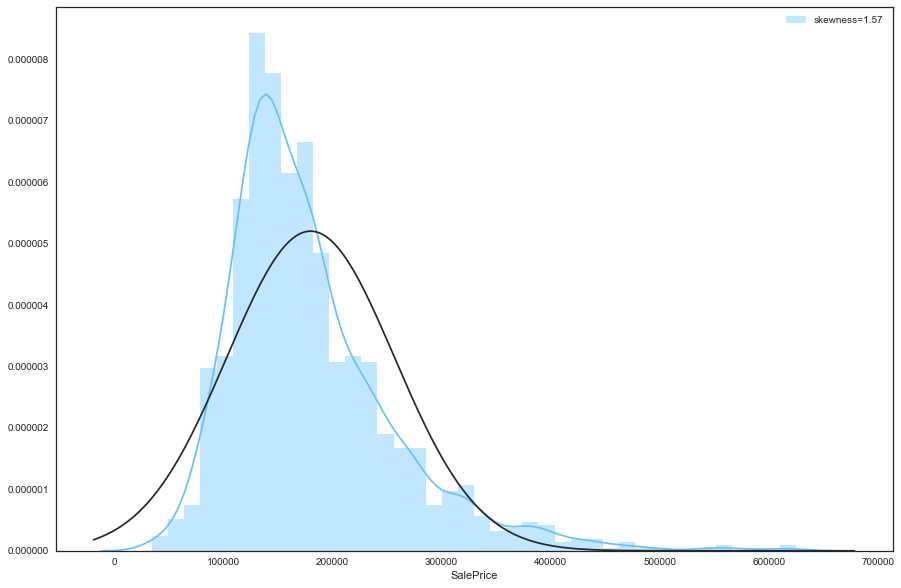

In [11]:
plt.subplots(figsize=(15,10))
g = sns.distplot(train['SalePrice'], fit=norm, label='skewness=%.2f'%(train['SalePrice'].skew()))
g = g.legend(loc='best')

In [12]:
train['SalePrice'] = np.log1p(train['SalePrice'])

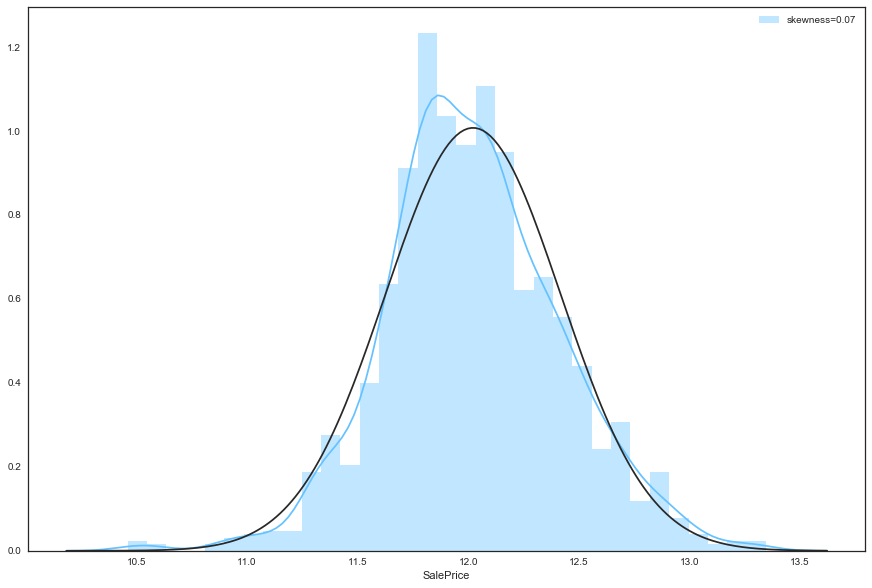

In [13]:
plt.subplots(figsize=(15,10))
g = sns.distplot(train['SalePrice'], fit=norm, label='skewness=%.2f'%(train['SalePrice'].skew()))
g = g.legend(loc='best')

### B: related feature work(Both train and test data should be considered)

** (2)concat train and test to get all_data, for data processing and feature engineer   
      record the number of train and test, and target feature in train**

In [14]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)

In [15]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [16]:
all_data.shape

(2915, 79)

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 79 columns):
1stFlrSF         2915 non-null int64
2ndFlrSF         2915 non-null int64
3SsnPorch        2915 non-null int64
Alley            198 non-null object
BedroomAbvGr     2915 non-null int64
BldgType         2915 non-null object
BsmtCond         2833 non-null object
BsmtExposure     2833 non-null object
BsmtFinSF1       2914 non-null float64
BsmtFinSF2       2914 non-null float64
BsmtFinType1     2836 non-null object
BsmtFinType2     2835 non-null object
BsmtFullBath     2913 non-null float64
BsmtHalfBath     2913 non-null float64
BsmtQual         2834 non-null object
BsmtUnfSF        2914 non-null float64
CentralAir       2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
Electrical       2914 non-null object
EnclosedPorch    2915 non-null int64
ExterCond        2915 non-null object
ExterQual        2915 non-null object
Exterior1st      291

** (3)Handle missing values **

Find all missing value and its ratio

In [18]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.loc[all_data_na != 0].sort_values(ascending=False)
all_data_na_rate = all_data_na / len(all_data)

missing_data = pd.DataFrame({'Missing_Count' : all_data_na, 'Missing_Rate' : all_data_na_rate})
missing_data

,Missing_Count,Missing_Rate
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageQual,159,0.054545
GarageCond,159,0.054545
GarageFinish,159,0.054545
GarageYrBlt,159,0.054545


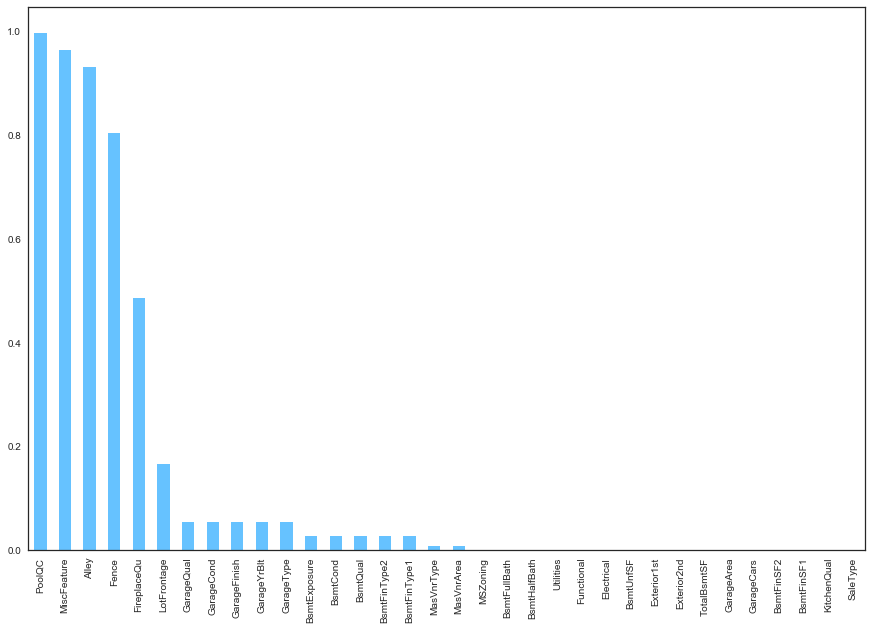

In [19]:
plt.subplots(figsize=(15,10))
missing_data['Missing_Rate'].plot(kind='bar')
plt.show()

According to each Feature meaning fill missing value.

** 1. Na --> category None**   
    (1) PoolQC  
    (2) Alley   
    (3) Fence  
    (4) FireplaceQu  
    (5) GarageQual  
    (6) GarageCond  
    (7) GarageFinish  
    (8) GarageType  
    (9) BsmtExposure  
    (10) BsmtCond  
    (11) BsmtQual  
    (12) BsmtFinType2  
    (13) BsmtFinType1    
    (14) MasVnrType  
    (15) MiscFeature  
** 2. Na --> Numerical type 0**   
    (1) GarageYrBlt   
    (2) MasVnrArea  
      
** 3. Na --> Missing value indeed numerical type**   
    (2) LotFrontage  
    (3) BsmtUnfSF  
    (4) TotalBsmtSF   
    (5) GarageArea  
    (6) GarageCars  
    (7) BsmtFinSF2  
    (8) BsmtFinSF1  
    
** 4. Na --> Missing value indeed category type**   
    (1) MSZoning  
    (2) BsmtFullBath(bool)  
    (3) BsmtHalfBath(bool)  
    (4) Utilities  
    (5) Functional  
    (6) Electrical  
    (7) Exterior1st  
    (8) Exterior2nd  
    (9) KitchenQual    
    (10) SaleType  

In [20]:

na_none = ['PoolQC','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType','MiscFeature'] 
na_zero = ['GarageYrBlt', 'MasVnrArea']
na_missing_num = ['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1']
na_missing_cate = ['MSZoning', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
na_missing_bool = ['BsmtFullBath', 'BsmtHalfBath']
 
for col in na_none:
    all_data[col] = all_data[col].fillna('None')

for col in na_zero:
    all_data[col] = all_data[col].fillna(0)
    
for col in na_missing_cate:
    all_data[col] = all_data.fillna(all_data[col].mode()[0])
    
for col in na_missing_num:
    all_data[col] = all_data[col].fillna(all_data[col].median())
    
for col in na_missing_bool:
    all_data[col] = all_data[col].fillna(1 if all_data[col].mean()>0.5 else 0)

In [21]:
_na = all_data.isnull().sum()

In [22]:
_na.drop(_na[_na==0].index)

Utilities    2
dtype: int64

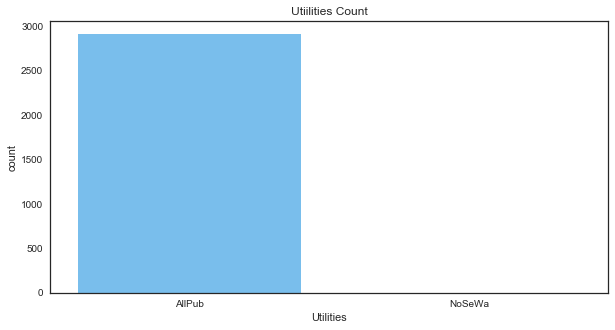

In [23]:
plt.subplots(figsize=(10,5))

g = sns.countplot(all_data['Utilities']).set_title('Utiilities Count')


In [24]:
# Drop the Feature 'Utilities'
all_data.drop(['Utilities'], axis=1, inplace=True)

In [25]:
_na = all_data.isnull().sum()

In [26]:
_na.drop(_na[_na==0].index)

Series([], dtype: int64)

** Missing Value Handling is complete! **

## 4: Feature Engineering

### (1)Correlation Matrix : 

1. Using this correlation matrix, I am able to visualise the raw highly influencing factors on SalePrice.
2. Create polynomial features from the highly correlating features, in an attempt to capture the complex non-linear relationships within the data.

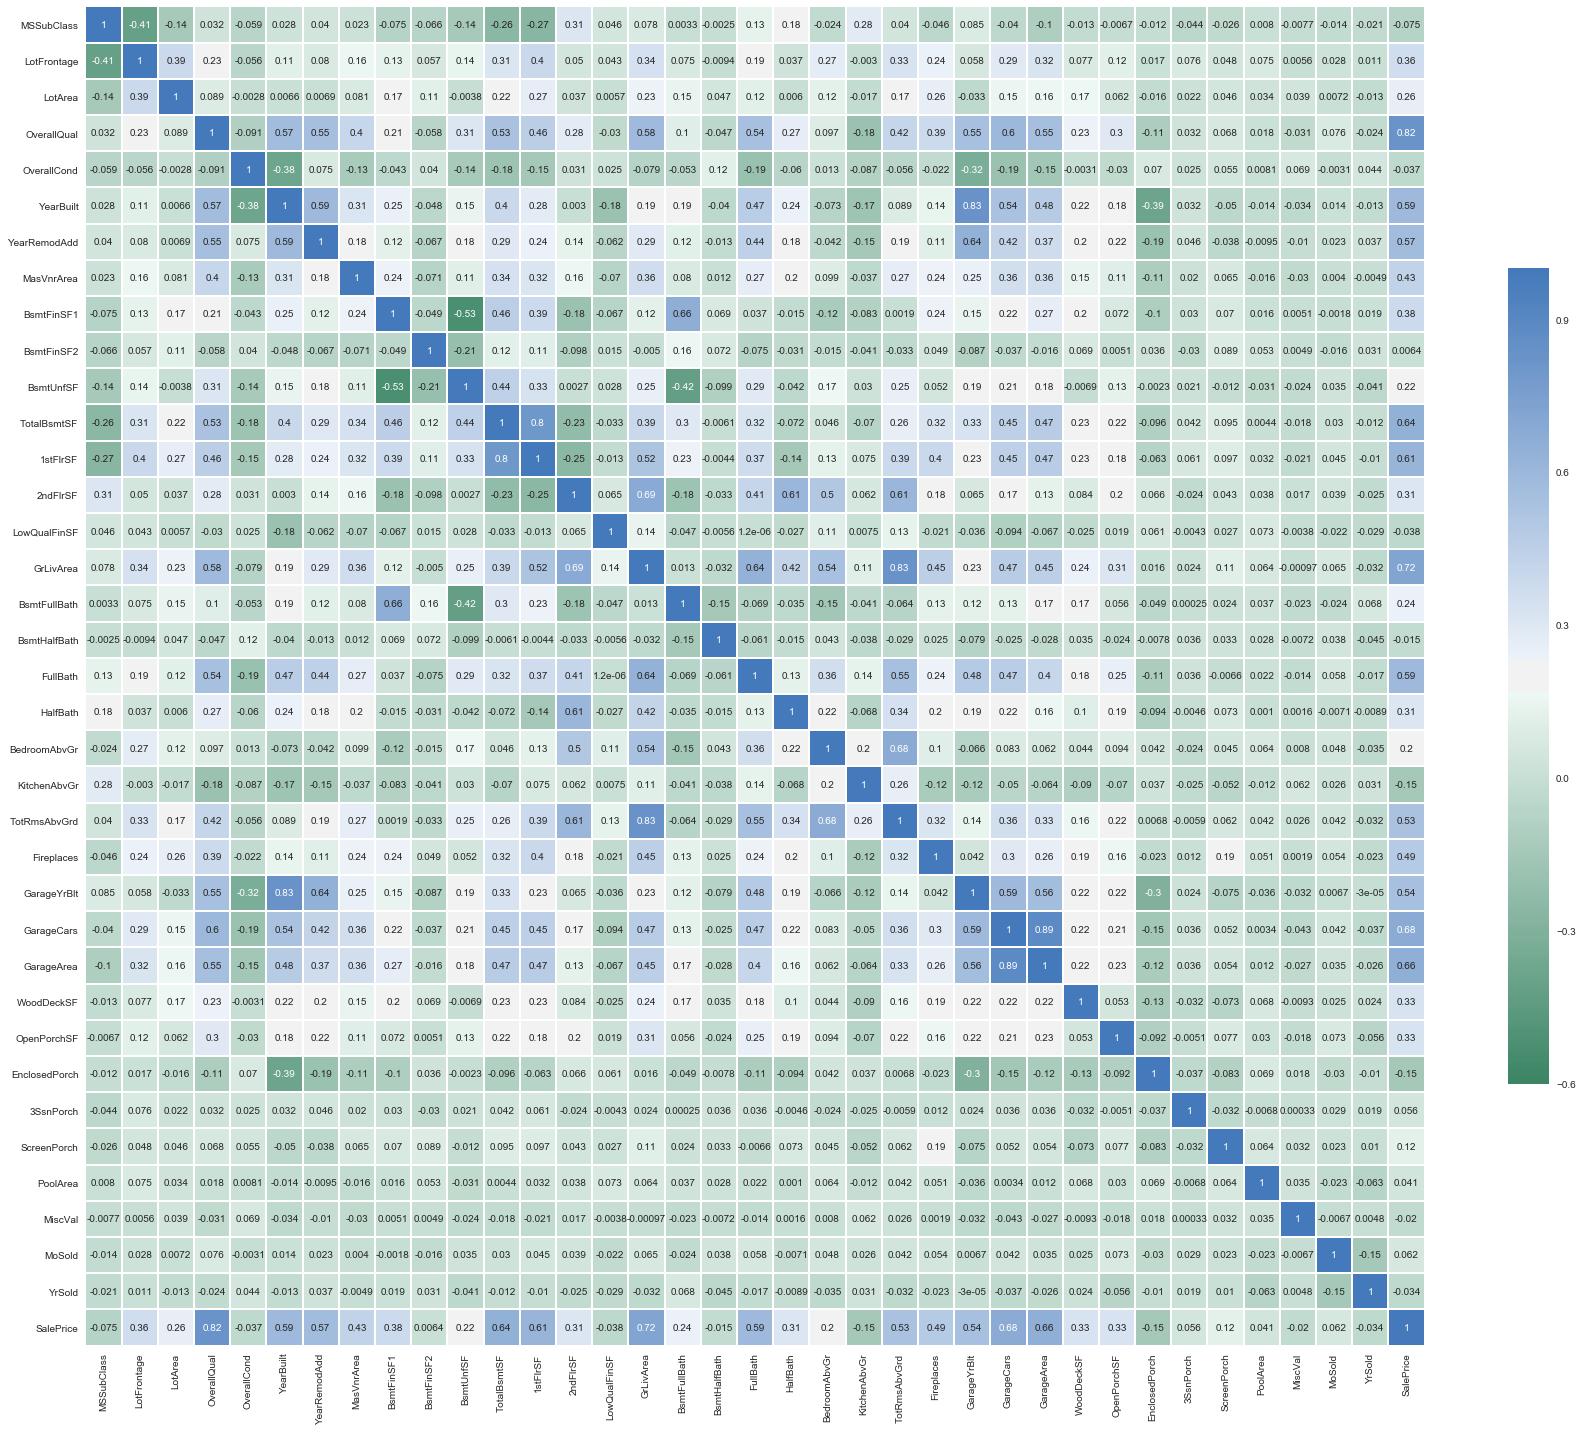

In [27]:
corr = train.corr()
plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=1, cbar_kws={"shrink": .5}, annot = True)

In [28]:
high_corr = []
for col in corr.columns:
    for val in corr[col].index:
        if (corr[col][val] >= 0.7) & (col != val):
            high_corr.append((col, val, corr[col][val]))

In [29]:
high_corr

[('OverallQual', 'SalePrice', 0.81924031162079158),
 ('YearBuilt', 'GarageYrBlt', 0.82519238408333095),
 ('TotalBsmtSF', '1stFlrSF', 0.80075898861470141),
 ('1stFlrSF', 'TotalBsmtSF', 0.80075898861470141),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8339786218944919),
 ('GrLivArea', 'SalePrice', 0.71884440082802181),
 ('TotRmsAbvGrd', 'GrLivArea', 0.8339786218944919),
 ('GarageYrBlt', 'YearBuilt', 0.82519238408333095),
 ('GarageCars', 'GarageArea', 0.88688169234367598),
 ('GarageArea', 'GarageCars', 0.88688169234367598),
 ('SalePrice', 'OverallQual', 0.81924031162079158),
 ('SalePrice', 'GrLivArea', 0.71884440082802181)]

In [30]:
 corr['SalePrice'].sort_values(ascending=False).loc[corr['SalePrice']>=0.3]

SalePrice       1.000000
OverallQual     0.819240
GrLivArea       0.718844
GarageCars      0.680408
GarageArea      0.655212
TotalBsmtSF     0.641553
1stFlrSF        0.613742
FullBath        0.590919
YearBuilt       0.588977
YearRemodAdd    0.568986
GarageYrBlt     0.544005
TotRmsAbvGrd    0.533446
Fireplaces      0.487126
MasVnrArea      0.430073
BsmtFinSF1      0.382710
LotFrontage     0.363286
WoodDeckSF      0.330573
OpenPorchSF     0.327038
HalfBath        0.311191
2ndFlrSF        0.306605
Name: SalePrice, dtype: float64

** NOTE : corr() is just used for numerical type, some Features, however, is appeared to be the numerical type**  
** Such as : Time Serise type, Bool type..., Although these features's value can calculate corr(), It's no sence!**  
** So , when we meet these types of feature , Droping them from corr matrix. **

In this set: YearBuilt, YearRemodAdd, GarageYrBlt are belong to time Serise   
             HalfBath is belong to bool type
So, we choose to Drop them.

In [31]:
corr.loc[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

Droping features mentioned above, we have 15 features tighly related with SalePrice totally.

### (2) Concrete Work on Features

#### 2.1 Polynomials 

Select 15 high corr features with target Feature SalePrice

In [32]:
# Quadratic

all_data["OverallQual-2"] = all_data["OverallQual"] ** 2
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageArea-2"] = all_data["GarageArea"] ** 2
all_data["TotalBsmtSF-2"] = all_data["TotalBsmtSF"] ** 2
all_data["1stFlrSF-2"] = all_data["1stFlrSF"] ** 2
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotRmsAbvGrd-2"] = all_data["TotRmsAbvGrd"] ** 2
all_data["Fireplaces-2"] = all_data["Fireplaces"] ** 2
all_data["MasVnrArea-2"] = all_data["MasVnrArea"] ** 2
all_data["BsmtFinSF1-2"] = all_data["BsmtFinSF1"] ** 2
all_data["LotFrontage-2"] = all_data["LotFrontage"] ** 2
all_data["WoodDeckSF-2"] = all_data["WoodDeckSF"] ** 2
all_data["OpenPorchSF-2"] = all_data["OpenPorchSF"] ** 2
all_data["2ndFlrSF-2"] = all_data["2ndFlrSF"] ** 2

In [33]:
# Cubic

all_data["OverallQual-3"] = all_data["OverallQual"] ** 3
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GarageCars-3"] = all_data["GarageCars"] ** 3
all_data["GarageArea-3"] = all_data["GarageArea"] ** 3
all_data["TotalBsmtSF-3"] = all_data["TotalBsmtSF"] ** 3
all_data["1stFlrSF-3"] = all_data["1stFlrSF"] ** 3
all_data["FullBath-3"] = all_data["FullBath"] ** 3
all_data["TotRmsAbvGrd-3"] = all_data["TotRmsAbvGrd"] ** 3
all_data["Fireplaces-3"] = all_data["Fireplaces"] ** 3
all_data["MasVnrArea-3"] = all_data["MasVnrArea"] ** 3
all_data["BsmtFinSF1-3"] = all_data["BsmtFinSF1"] ** 3
all_data["LotFrontage-3"] = all_data["LotFrontage"] ** 3
all_data["WoodDeckSF-3"] = all_data["WoodDeckSF"] ** 3
all_data["OpenPorchSF-3"] = all_data["OpenPorchSF"] ** 3
all_data["2ndFlrSF-3"] = all_data["2ndFlrSF"] ** 3

In [34]:
# Square Root

all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
all_data["TotRmsAbvGrd-Sq"] = np.sqrt(all_data["TotRmsAbvGrd"])
all_data["Fireplaces-Sq"] = np.sqrt(all_data["Fireplaces"])
all_data["MasVnrArea-Sq"] = np.sqrt(all_data["MasVnrArea"])
all_data["BsmtFinSF1-Sq"] = np.sqrt(all_data["BsmtFinSF1"])
all_data["LotFrontage-Sq"] = np.sqrt(all_data["LotFrontage"])
all_data["WoodDeckSF-Sq"] = np.sqrt(all_data["WoodDeckSF"])
all_data["OpenPorchSF-Sq"] = np.sqrt(all_data["OpenPorchSF"])
all_data["2ndFlrSF-Sq"] = np.sqrt(all_data["2ndFlrSF"])